In [1]:
import numpy as np
import matplotlib.pylab as plt
% matplotlib inline 


In [26]:
def R_n(n,alpha):
    N=len(n)/2
    nfloat=np.array(n)*1.0
    R_n=np.zeros(2*N)
    def R_x1(nfloat,N,alpha):
        return 2.**(-1)*(1.-((nfloat[:N+1])/N)**alpha)
    R_n[n[:N]]=R_x1(nfloat[:N],N,alpha)
    R_n[n[N:]]=R_x1(2*N-nfloat[N:],N,alpha) 
    return R_n

In [36]:
def S_K(n,alpha):
    return np.fft.fft(R_n(n,alpha))
    
    
    

In [86]:
def X_k(k):
    N=len(k)/2
    X_k=np.zeros(2*N)
    ##################
    S_k=S_K(k,alpha)
    phi= np.random.rand(2*N)*2*np.pi
    grandom=np.random.normal(0,1,2*N)
    #print N
    #print k[1:N]
    #print 2*N-k[N+1:]
    def X_k1(k1):          
        ######################
        X_k1=np.exp(+1j*phi[k1])*grandom[k1]*np.sqrt(S_k[k1])
        ######################     
        return X_k1
    
    X_k[k[1:N]]=X_k1(k[1:N])
    
    ######################
    X_k[N]=grandom[N]*np.sqrt(S_k[N])
    #####################
   
    X_k[k[N+1:]]=np.conjugate(X_k1(2*N-np.array(k[N+1:])))    
    return X_k

In [87]:
def x_n(N,alpha):
    n=range(2*N)
    k=range(2*N)
    return np.fft.fft(X_k(k))

/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


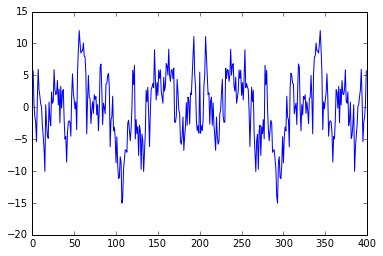

In [88]:
#main
n=range(0,200)
alpha=0.5
r_m=R_n(n,alpha)
s_k=S_k(n,alpha)
plt.plot(x_n(200,0.5))

In [90]:
r_t_allparticles=[]
for particle in range(100):
    r_t=np.zeros(1001)
    r_t[1:]=np.cumsum(x_n(500,alpha))
    r_t_allparticles.append(r_t)
traject=np.array(r_t_allparticles)
    

/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: ComplexWarning: Casting complex values to real discards the imaginary part


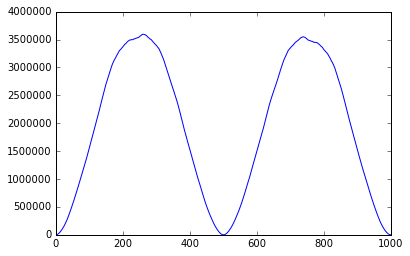

In [93]:
r_t_allparticles_squared=abs(traject)**2
msd=r_t_allparticles_squared.mean(axis=0)
plt.plot(msd)